In [1]:
#Data import
import pandas as pd
import numpy as np

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

X = iris.data

Y = iris.target

In [4]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [5]:
from sklearn.svm import SVC

In [6]:
model = SVC()

In [7]:
from sklearn.cross_validation import train_test_split

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.4,random_state = 3)

In [18]:
model.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
from sklearn import metrics

In [20]:
Y_pred = model.predict(X_test)

In [21]:
print(metrics.accuracy_score(Y_test,Y_pred) * 100)

96.66666666666667


In [22]:
from sklearn import svm

In [25]:
X = iris.data[:,:2]
Y = iris.target

In [27]:
C = 1.0

In [29]:
svc = svm.SVC(kernel = "linear",C=C).fit(X,Y)

In [30]:
rbf_svc = svm.SVC(kernel = "rbf",gamma = 0.7, C=C).fit(X,Y)

In [31]:
poly_svc = svm.SVC(kernel = "poly",degree=3,C=C).fit(X,Y)

In [32]:
lin_svc = svm.LinearSVC(C=C).fit(X,Y)

In [33]:
h = 0.02

x_min = X[:,0].min()-1
x_max = X[:,0].max()+1

In [35]:
y_min = X[:,1].min()-1
y_max = X[:,1].max()+1

In [37]:
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

In [42]:
titles = ['svm.SVC,kernel = "linear"',
         'svm.SVC,kernel = "rbf",gamma = 0.7',
         'svm.SVC,kernel = "poly",degree=3',
         'svm.LinearSVC']

/home/alex/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:946: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')
/home/alex/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:946: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')
/home/alex/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:946: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')
/home/alex/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:946: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')


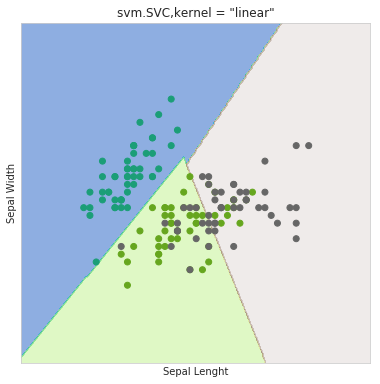

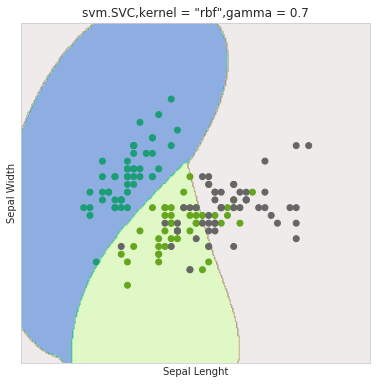

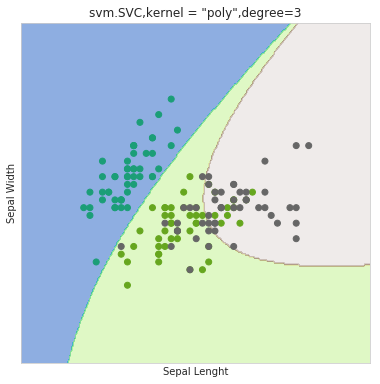

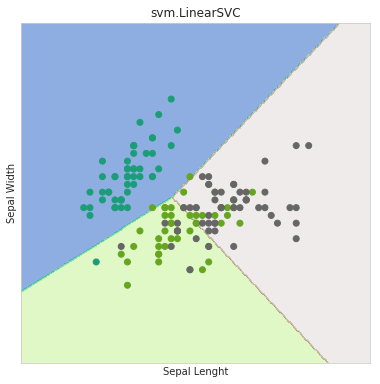

In [43]:
for i,clf in enumerate((svc,rbf_svc,poly_svc,lin_svc)):
    
    plt.figure(figsize = (15,15))
    
    plt.subplot(2,2,i+1)
    
    plt.subplots_adjust(wspace=0.4,hspace = 0.4)
    
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx,yy,Z,cmap=plt.cm.terrain,alpha=0.5,linewidths = 0)
    
    plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Dark2)
    
    plt.xlabel("Sepal Lenght")
    
    plt.ylabel("Sepal Width")
    
    plt.xlim(xx.min(),xx.max())
    
    plt.ylim(yy.min(),yy.max())
    
    
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])